In [1]:
# To analyse model performace based on which features were used during training

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


asteroid1 = pd.read_csv('../../TestData/cleaned_asteroid_data.csv')

asteroid1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958519 entries, 0 to 958518
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   neo     958519 non-null  int64  
 1   pha     958519 non-null  int64  
 2   H       958519 non-null  float64
 3   e       958519 non-null  float64
 4   a       958519 non-null  float64
 5   q       958519 non-null  float64
 6   i       958519 non-null  float64
 7   om      958519 non-null  float64
 8   w       958519 non-null  float64
 9   ma      958519 non-null  float64
 10  ad      958519 non-null  float64
 11  n       958519 non-null  float64
 12  tp      958519 non-null  float64
 13  per     958519 non-null  float64
 14  per_y   958519 non-null  float64
 15  moid    958519 non-null  float64
 16  class   958519 non-null  object 
 17  rms     958519 non-null  float64
dtypes: float64(15), int64(2), object(1)
memory usage: 131.6+ MB


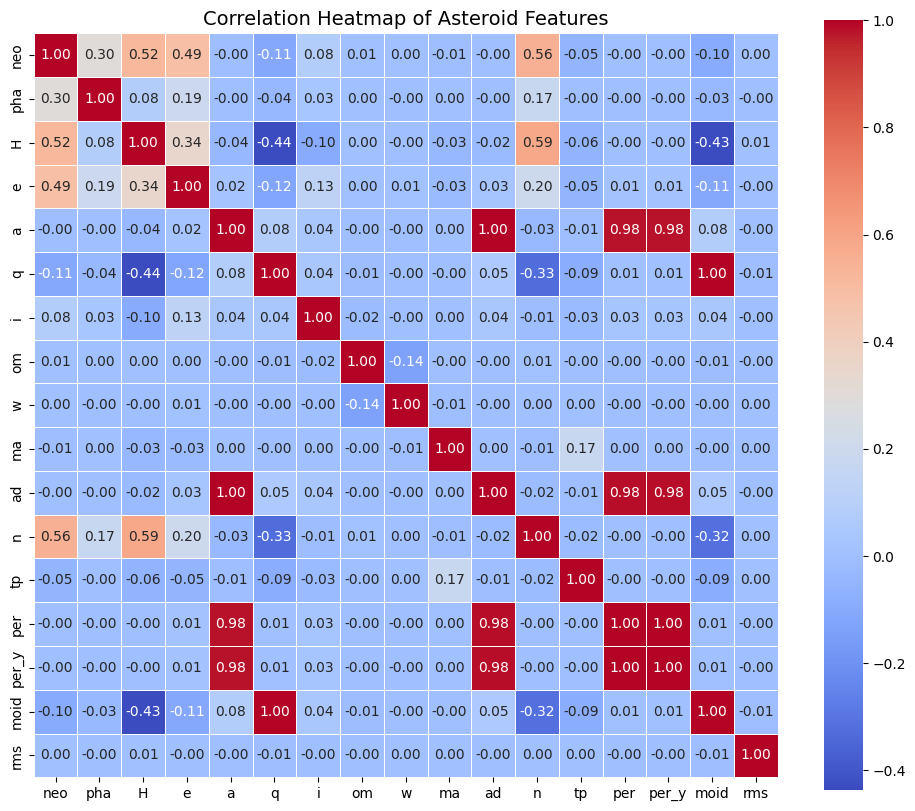

In [2]:
numeric_df = asteroid1.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Asteroid Features", fontsize=14)
plt.show()

In [3]:
asteroid2=asteroid1

classes_to_drop = ['CEN', 'AST', 'IEO', 'ATE']
df_filtered = asteroid2[~asteroid2['class'].isin(classes_to_drop)]

df_mba_reduced = df_filtered[df_filtered['class'] == 'MBA'].sample(n=30000, random_state=42)

df_others = df_filtered[df_filtered['class'] != 'MBA']

asteroid2 = pd.concat([df_mba_reduced, df_others], ignore_index=True)

print(asteroid2['class'].value_counts())

class
MBA    30000
OMB    28355
IMB    20360
MCA    18685
APO    12687
AMO     8457
TJN     8221
TNO     3467
Name: count, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = asteroid2.drop('class', axis=1)
y = asteroid2['class']

y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 130232 entries, 0 to 130231
Series name: class
Non-Null Count   Dtype 
--------------   ----- 
130232 non-null  object
dtypes: object(1)
memory usage: 1017.6+ KB


In [ ]:
# q (Perihelion Distance) was identified as the most important feature
# Therefore training and evaluating the model using only this feature


X_q = X[['q']]

X_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130232 entries, 0 to 130231
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   q       130232 non-null  float64
dtypes: float64(1)
memory usage: 1017.6 KB


In [8]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X_q, y, test_size=0.15, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [10]:
# Model 1
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_val_1 = lr.predict(X_val_scaled)

print("Validation Accuracy:", accuracy_score(y_val, y_pred_val_1))
print("\nClassification Report:\n", classification_report(y_val, y_pred_val_1))

Validation Accuracy: 0.8358667280822969

Classification Report:
               precision    recall  f1-score   support

         AMO       1.00      0.37      0.54      1269
         APO       0.77      1.00      0.87      1904
         IMB       0.80      0.98      0.88      3055
         MBA       0.83      0.67      0.74      4501
         MCA       0.91      0.92      0.91      2803
         OMB       0.79      0.86      0.82      4254
         TJN       0.99      0.99      0.99      1233
         TNO       1.00      0.97      0.98       520

    accuracy                           0.84     19539
   macro avg       0.89      0.84      0.84     19539
weighted avg       0.85      0.84      0.83     19539



In [11]:
# Model 2
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_val_2 = rf.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred_val_2))
print("\nClassification Report:\n", classification_report(y_val, y_pred_val_2))

Validation Accuracy: 0.8402170018936486

Classification Report:
               precision    recall  f1-score   support

         AMO       1.00      1.00      1.00      1269
         APO       1.00      1.00      1.00      1904
         IMB       0.84      0.85      0.85      3055
         MBA       0.67      0.66      0.67      4501
         MCA       0.99      0.99      0.99      2803
         OMB       0.74      0.74      0.74      4254
         TJN       0.99      0.99      0.99      1233
         TNO       0.97      0.98      0.98       520

    accuracy                           0.84     19539
   macro avg       0.90      0.90      0.90     19539
weighted avg       0.84      0.84      0.84     19539



In [ ]:
# Visible worse performance compared to using all features
# Indicates that other features also contribute significantly to model performance

In [12]:
X_qmoid = X[['q', 'moid']]

X_qmoid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130232 entries, 0 to 130231
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   q       130232 non-null  float64
 1   moid    130232 non-null  float64
dtypes: float64(2)
memory usage: 2.0 MB


In [13]:
X_temp2, X_test2, y_temp2, y_test2 = train_test_split(
    X_qmoid, y, test_size=0.15, random_state=42, stratify=y)

X_train2, X_val2, y_train2, y_val2 = train_test_split(
    X_temp2, y_temp2, test_size=0.1765, random_state=42, stratify=y_temp2)

In [14]:
X_train_scaled2 = scaler.fit_transform(X_train2)
X_val_scaled2   = scaler.transform(X_val2)
X_test_scaled2  = scaler.transform(X_test2)

In [15]:
# Model 1
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr2 = LogisticRegression(max_iter=1000)
lr2.fit(X_train_scaled2, y_train2)
y_pred_val_3 = lr2.predict(X_val_scaled2)

print("Validation Accuracy:", accuracy_score(y_val2, y_pred_val_3))
print("\nClassification Report:\n", classification_report(y_val2, y_pred_val_3))

Validation Accuracy: 0.8489687292082502

Classification Report:
               precision    recall  f1-score   support

         AMO       0.99      0.62      0.76      1269
         APO       0.85      1.00      0.92      1904
         IMB       0.79      0.96      0.86      3055
         MBA       0.82      0.67      0.74      4501
         MCA       0.92      0.92      0.92      2803
         OMB       0.79      0.86      0.83      4254
         TJN       0.99      0.99      0.99      1233
         TNO       1.00      0.97      0.99       520

    accuracy                           0.85     19539
   macro avg       0.90      0.87      0.88     19539
weighted avg       0.85      0.85      0.84     19539



In [19]:
# Model 2
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_estimators=200, random_state=42)
rf2.fit(X_train2, y_train2)
y_pred_val_4 = rf2.predict(X_val2)

print("Validation Accuracy:", accuracy_score(y_val2, y_pred_val_4))
print("\nClassification Report:\n", classification_report(y_val2, y_pred_val_4))

Validation Accuracy: 0.8881723732023133

Classification Report:
               precision    recall  f1-score   support

         AMO       1.00      1.00      1.00      1269
         APO       1.00      1.00      1.00      1904
         IMB       0.87      0.92      0.90      3055
         MBA       0.78      0.73      0.75      4501
         MCA       0.99      1.00      1.00      2803
         OMB       0.81      0.83      0.82      4254
         TJN       1.00      1.00      1.00      1233
         TNO       1.00      0.98      0.99       520

    accuracy                           0.89     19539
   macro avg       0.93      0.93      0.93     19539
weighted avg       0.89      0.89      0.89     19539



In [20]:
# Improved performance compared to using only 'q'
# Suggests that 'moid' also plays a significant role in classification alongside 'q'

# Therefore adding more features enhances model performance
# It is not entirely sufficient to rely on a single feature for accurate classification